# Lab: k-Nearest Neighbors (kNN) Classification

In this lab, you will:

- Manually compute L1 (Manhattan) and L2 (Euclidean) distances.
- Build and explore a toy dataset using kNN.
- Apply kNN to the Iris dataset with hyperparameter tuning.
- Learn the importance of feature scaling using MinMaxScaler.
- Investigate the curse of dimensionality by analyzing pairwise distances in synthetic data.
- Address class imbalance with SMOTE.

## Manual Distance Computation

In this section, you will implement functions to compute the L1 (Manhattan) and L2 (Euclidean) distances between two points. 

These distance metrics are fundamental to understanding how kNN makes predictions by comparing the similarity between data points.

In [4]:
import math

p1 = [1, 0]
p2 = [4, 5]

# function to calculate the Manhattan (L1) distance between two points
def l1_distance(point1, point2):
    distance = 0
    for i in range(len(point1)):
        a_point = point1[i]
        b_point = point2[i]
        distance += abs(a_point - b_point)
    return distance

print("L1 distance:", l1_distance(p1, p2)) 

L1 distance: 8


In [5]:
# function to calculate the Euclidean (L2) distance between two points
def l2_distance(point1, point2):
    sum_sq = 0
    for i in range(len(point1)):
        a_point = point1[i]
        b_point = point2[i]
        sum_sq += (a_point - b_point) ** 2

    return (sum_sq) ** (1/2)

print("L2 distance:", l2_distance(p1, p2))  

L2 distance: 5.830951894845301


In [6]:
# expand this to the third dimension
p1 = [1, 0, 3]
p2 = [4, 5, 2]

print("L1 distance:", l1_distance(p1, p2)) 
print("L2 distance:", l2_distance(p1, p2))  

L1 distance: 9
L2 distance: 5.916079783099616


## kNN on a Toy Dataset

In this section, you'll create a small toy dataset with two features (e.g., `kibble_grams` and `noise_dB`) and three classes (e.g., dog, cat, hamster). Using scikit-learn's `KNeighborsClassifier`, you'll train a kNN model with `n_neighbors=3` on this dataset and evaluate its training performance.

In [110]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

from sklearn.model_selection import train_test_split, GridSearchCV

# create a toy dataset with 15 samples (5 per class)
data = {
    "kibble_grams": [200, 250, 115, 300, 50, 138, 128, 142, 280, 317, 282, 270, 69, 32, 31],
    "noise_dB":     [ 40,  60,  45,  80, 75,  38,  49,  42,  76,  88,  80,  73, 77, 75, 77],
    "animal": [
        "cat", "dog", "cat", "dog", "hamster",
        "cat", "cat", "cat",
        "dog", "dog", "dog", "dog",
        "hamster", "hamster", "hamster"
    ]
}

# convert to DataFrame
df = pd.DataFrame(data)
df.head()

,kibble_grams,noise_dB,animal
0,200,40,cat
1,250,60,dog
2,115,45,cat
3,300,80,dog
4,50,75,hamster


In [111]:
# TODO: Create predictor & target
X = df.drop(columns=["animal"])
y = df["animal"]

# TODO: Split into train/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [112]:
# initialize and train the kNN classifier with k=3, & a distance metric of 'cityblock'
# DOCS: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
knn_toy = KNeighborsClassifier(n_neighbors=3, metric='cityblock')
knn_toy.fit(X_train, y_train)

KNeighborsClassifier(metric='cityblock', n_neighbors=3)

In [113]:
# predict the class for a new sample
predicted_class = knn_toy.predict(X_test)
print("Predicted class:", predicted_class)
print("Actual class:", y_test.tolist())

Predicted class: ['dog' 'dog' 'cat' 'hamster' 'cat']
Actual class: ['dog', 'dog', 'cat', 'hamster', 'cat']


## kNN on the Maternal Risk Dataset & Hyperparameter Tuning

In this section, we'll apply the kNN algorithm to the maternal risk dataset. You will:

- Load the maternal risk dataset using pandas.
- Perform EDA.
- Split the dataset into training and testing sets.
- Iteratively tune the hyperparameter k (number of neighbors) to determine the best value based on test accuracy.

In [114]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# TODO: load the "maternal" dataset
# docs: https://archive.ics.uci.edu/dataset/863/maternal+health+risk
maternal_risk = pd.read_csv("maternal.csv")

maternal_risk.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [115]:
# TODO: perform EDA
...

In [116]:
# TODO: select your predictors & target
X = maternal_risk.drop(columns=["RiskLevel"])

# TODO: the dataset into training and testing sets
y = maternal_risk["RiskLevel"]

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [117]:
# create a basic knn model with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Evaluate the classifier on the scaled test data
yhat = knn.predict(X_test)
accuracy = accuracy_score(y_test, yhat)

print("Testing accuracy on non-scaled data:", accuracy)

Testing accuracy on non-scaled data: 0.6918032786885245


In [118]:
# define range of k values to test (1 to 30)
k_values = range(1, 30)  

train_accuracies = []
test_accuracies = []

# evaluate kNN for each k in the specified range
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    
    train_accuracies.append(1 - accuracy_score(y_train, train_pred))
    test_accuracies.append(1 - accuracy_score(y_test, test_pred))

print("Average training accuracy", sum(train_accuracies) / len(train_accuracies))
print("Average testing accuracy", sum(test_accuracies) / len(test_accuracies))

Average training accuracy 0.26628082291717325
Average testing accuracy 0.38111927642736004


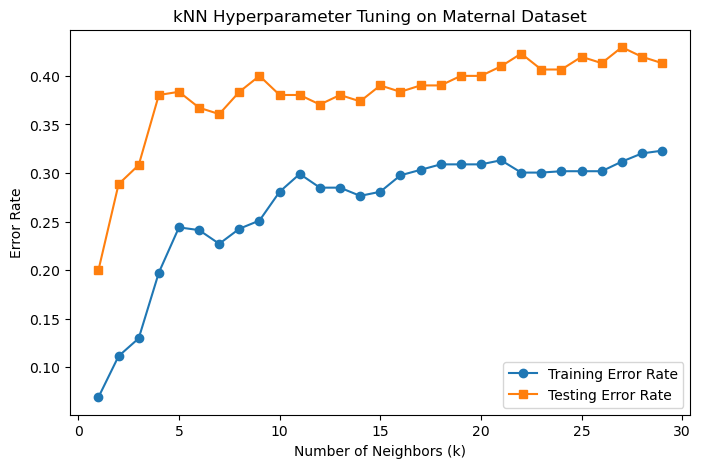

Best k for test accuracy: 1


In [119]:
# Plot the performance for each k
plt.figure(figsize=(8, 5))
plt.plot(k_values, train_accuracies, marker='o', label="Training Error Rate")
plt.plot(k_values, test_accuracies, marker='s', label="Testing Error Rate")

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Error Rate")
plt.title("kNN Hyperparameter Tuning on Maternal Dataset")
plt.legend()
plt.show()

# Determine best k based on highest test accuracy
best_k = k_values[test_accuracies.index(min(test_accuracies))]
print("Best k for test accuracy:", best_k)

## Data Scaling with MinMaxScaler

Scaling features is crucial for distance-based algorithms like kNN. In this section, you will:

- Scale the maternal dataset using scikit-learn's `MinMaxScaler` so that all features lie in the range [0, 1].
- Retrain the kNN model on the scaled data and observe any improvements in performance.

On the job, ensuring that your data is appropriately scaled can significantly improve model performance.

In [120]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler to scale data to the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data, then transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled training data to a DataFrame for a quick visualization
df_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
print("First five rows of the scaled training data:")
print(df_scaled.head())

First five rows of the scaled training data:
        Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate
0  0.733333    0.777778     1.000000  0.692308       0.0   0.710843
1  0.666667    0.777778     0.803922  0.692308       0.0   1.000000
2  0.133333    0.555556     0.607843  0.146154       0.8   0.831325
3  0.466667    0.722222     0.215686  0.146154       0.6   0.951807
4  0.416667    0.222222     0.411765  0.069231       0.0   0.759036


In [121]:
# Retrain kNN on the scaled data using k=3 for illustration
knn_scaled = KNeighborsClassifier(n_neighbors=3)
knn_scaled.fit(X_train_scaled, y_train)

# Evaluate the classifier on the scaled test data
test_pred_scaled = knn_scaled.predict(X_test_scaled)
scaled_accuracy = accuracy_score(y_test, test_pred_scaled)

print("Testing accuracy on scaled data:", scaled_accuracy)

Testing accuracy on scaled data: 0.6852459016393443


In [122]:
# define range of k values to test (1 to 30)
k_values = range(1, 30)  

train_accuracies_scaled = []
test_accuracies_scaled = []

# evaluate kNN for each k in the specified range
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    train_pred = knn.predict(X_train_scaled)
    test_pred = knn.predict(X_test_scaled)
    
    train_accuracies_scaled.append(1 - accuracy_score(y_train, train_pred))
    test_accuracies_scaled.append(1 - accuracy_score(y_test, test_pred))

print("Average training accuracy", sum(train_accuracies_scaled) / len(train_accuracies_scaled))
print("Average testing accuracy", sum(test_accuracies_scaled) / len(test_accuracies_scaled))

Average training accuracy 0.26589173678323036
Average testing accuracy 0.3190503109101187


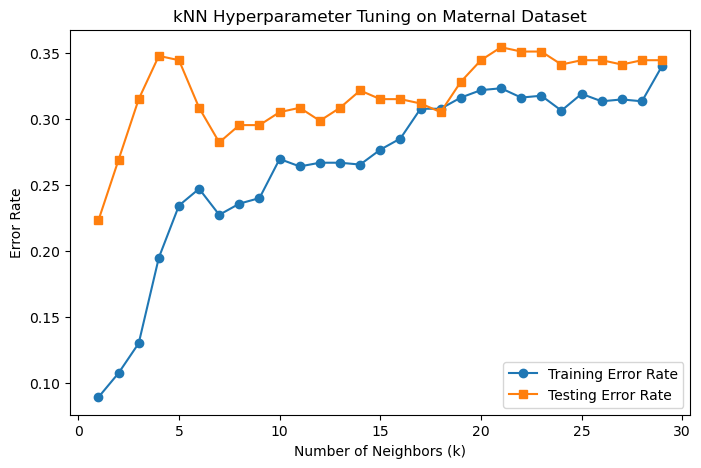

Best k for test accuracy: 1


In [123]:
# Plot the performance for each k
plt.figure(figsize=(8, 5))
plt.plot(k_values, train_accuracies_scaled, marker='o', label="Training Error Rate")
plt.plot(k_values, test_accuracies_scaled, marker='s', label="Testing Error Rate")

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Error Rate")
plt.title("kNN Hyperparameter Tuning on Maternal Dataset")
plt.legend()
plt.show()

# Determine best k based on highest test accuracy
best_k = k_values[test_accuracies.index(min(test_accuracies))]
print("Best k for test accuracy:", best_k)

In [ ]:
# TODO: Implement full grid-search on the knn model to find best hyperparams
params = {
    ...
}

knn = KNeighborsClassifier()

# TODO: set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(...)

# TODO: fit this model on your training data
...

## Exploring the Curse of Dimensionality

As the number of features (dimensions) increases, the distance between data points tends to converge, making it difficult for algorithms like kNN to distinguish between nearby and distant points.

In this section, you will explore the concept of the curse of dimensionality by computing the average pairwise distances in synthetic data as the number of dimensions increases.

In [125]:
import numpy as np

def average_pairwise_distance(data):
    n = len(data)
    distances = []
    for i in range(n):
        for j in range(i+1, n):
            diff = np.array(data[i]) - np.array(data[j])
            distances.append(np.sqrt(np.sum(diff**2)))
    return np.mean(distances)

num_points = 50
np.random.seed(42)

print("Average Pairwise Distances for Increasing Dimensions:")

for dim in range(1, 11):  # From 1 to 10 dimensions
    data = np.random.rand(num_points, dim)
    avg_dist = average_pairwise_distance(data)
    print("Dimension {}: Average distance = {:.3f}".format(dim, avg_dist))

Average Pairwise Distances for Increasing Dimensions:
Dimension 1: Average distance = 0.334
Dimension 2: Average distance = 0.548
Dimension 3: Average distance = 0.673
Dimension 4: Average distance = 0.822
Dimension 5: Average distance = 0.873
Dimension 6: Average distance = 0.980
Dimension 7: Average distance = 1.080
Dimension 8: Average distance = 1.133
Dimension 9: Average distance = 1.195
Dimension 10: Average distance = 1.258


## Handling Class Imbalance with SMOTE

Class imbalance can negatively impact the performance of classification algorithms. In this section, you will:

- Create a synthetic imbalanced dataset where one class is underrepresented.
- Train a kNN classifier on the imbalanced data to obtain a baseline accuracy.
- Apply SMOTE (Synthetic Minority Over-sampling Technique) to rebalance the training set.
- Retrain the kNN model and compare the performance after applying SMOTE.

This process reflects real-world scenarios where class imbalance is common, such as fraud detection or medical diagnosis.

In [126]:
# Run me!
!pip install imblearn

In [160]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# import the imbalanced sample dataset that you'll be working with for your TLAB
sample = pd.read_csv("sample.csv")

sample.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,CASH_OUT,177585.90,C1974240193,25115.00,0.00,C572986301,266286.98,443872.89,0,0
1,CASH_IN,295468.97,C621714984,6449944.27,6745413.24,C1698287046,351453.59,55984.62,0,0
2,CASH_IN,212555.73,C2109613102,4543422.46,4755978.20,C1222590577,10013669.10,9801113.37,0,0
3,CASH_OUT,1226.94,C1321529474,0.00,0.00,C98413973,280914.86,282141.80,0,0
4,CASH_OUT,61152.99,C2014741058,0.00,0.00,C549981569,275058.27,336211.26,0,0


In [161]:
# TODO: explore your ratio of fraud vs non-fraudulent cases (visually or otherwise)
...

In [162]:
# TODO: split the data into features and labels, select 2 numerical columns
X = sample[["oldbalanceOrg", "amount"]]
y = sample["isFraud"]

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train kNN on the imbalanced data
knn_imb = KNeighborsClassifier(n_neighbors=3)
knn_imb.fit(X_train, y_train)

yhat = knn_imb.predict(X_test)
baseline_acc = accuracy_score(y_test, yhat)

print("Baseline testing accuracy (imbalanced) (WOW AMAZING!):", baseline_acc)

Baseline testing accuracy (imbalanced) (WOW AMAZING!): 0.9973333333333333


In [163]:
# but let's see the entire picture...
print(precision_score(y_test, yhat))

0.0


c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [166]:
# Apply SMOTE to rebalance the training set (number of neighbors needs to be less than number of minority class samples)
smote = SMOTE(k_neighbors=2, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(y_train_smote.value_counts())

Class distribution after SMOTE:
isFraud
0    3497
1    3497
Name: count, dtype: int64


In [169]:
# Retrain kNN on the balanced data
knn_smote = KNeighborsClassifier(n_neighbors=3)
knn_smote.fit(X_train_smote, y_train_smote)

yhat_pred = knn_smote.predict(X_test)
smote_acc = accuracy_score(y_test, yhat_pred)

print("Testing accuracy after applying SMOTE:", smote_acc)

Testing accuracy after applying SMOTE: 0.994


In [170]:
# but let's see the entire picture...
print(precision_score(y_test, yhat_pred))

0.2222222222222222


## Conclusion

In this lab, you explored the k-Nearest Neighbors algorithm from multiple angles:

- You started by manually calculating distance metrics.
- You built a toy dataset and implemented a kNN classifier on it.
- You applied kNN on the Iris dataset and tuned the hyperparameter k.
- You learned the importance of feature scaling on distance-based models.
- You investigated the curse of dimensionality and addressed class imbalance with SMOTE.

These fundamental techniques are critical in real-world scenarios where data preparation, model tuning, and handling imbalances can have a significant impact on the performance of machine learning models.

Great job working through these exercises!